# Coleta e Importação dos Dados


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Link da API com os dados
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Carregar os dados diretamente da API usando requests
response = requests.get(api_url)
data = response.json()

# Achatar os dados JSON aninhados
flattened_data = []
for record in data:
    flat_record = {"customerID": record["customerID"], "Churn": record["Churn"]}
    for k, v in record["customer"].items():
        flat_record[k] = v
    for k, v in record["phone"].items():
        flat_record[k] = v
    for k, v in record["internet"].items():
        flat_record[k] = v
    for k, v in record["account"].items():
        if k == "Charges":
            for sub_k, sub_v in v.items():
                flat_record[f"Charges_{sub_k}"] = sub_v
        else:
            flat_record[k] = v
    flattened_data.append(flat_record)

# Criar DataFrame do Pandas
df = pd.DataFrame(flattened_data)

print("Dados carregados com sucesso!")

Dados carregados com sucesso!


# 2. Exploração Inicial e Compreensão da Estrutura dos Dados

In [ ]:
# Informações gerais do DataFrame
print("\nInformações do DataFrame:")
df.info()

# Tipos de dados das colunas
print("\nTipos de Dados das Colunas:")
print(df.dtypes)

# Exibir as primeiras 5 linhas do DataFrame
print("\nPrimeiras 5 linhas do DataFrame:")
print(df.head())


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract       

# 3. Limpeza e Tratamento dos Dados (ETL)

In [ ]:
# Converter 'Charges_Total' para numérico, tratando erros como NaN
df["Charges_Total"] = pd.to_numeric(df["Charges_Total"], errors="coerce")

# Tratar valores ausentes em 'Charges_Total' (remover linhas com NaN)
# Verificamos que há 11 valores ausentes nesta coluna.
df.dropna(subset=["Charges_Total"], inplace=True)
print(f"Número de linhas após remover NaNs em Charges_Total: {len(df)}")

# Tratar valores vazios na coluna 'Churn' (substituir por 'No')
# Verificamos que alguns registros de Churn estavam vazios.
df["Churn"] = df["Churn"].replace({"": "No"})
print("Valores vazios em Churn tratados.")

# Converter 'SeniorCitizen' para booleano
df["SeniorCitizen"] = df["SeniorCitizen"].astype(bool)
print("SeniorCitizen convertido para booleano.")

# Verificar por linhas duplicadas
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("Nenhuma linha duplicada encontrada.")
else:
    print(f"Foram encontradas {len(duplicate_rows)} linhas duplicadas. Removendo...")
    df.drop_duplicates(inplace=True)
    print(f"Número de linhas após remover duplicadas: {len(df)}")

print("Limpeza e tratamento dos dados concluídos.")

Número de linhas após remover NaNs em Charges_Total: 7256
Valores vazios em Churn tratados.
SeniorCitizen convertido para booleano.
Nenhuma linha duplicada encontrada.
Limpeza e tratamento dos dados concluídos.


# 4. Análise Exploratória de Dados (EDA) e Visualizações

/tmp/ipython-input-4-1951994045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="viridis")


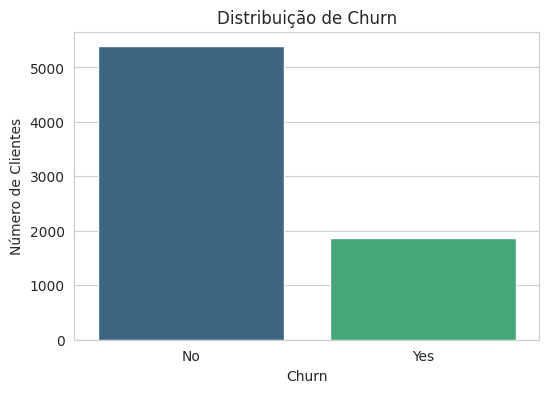

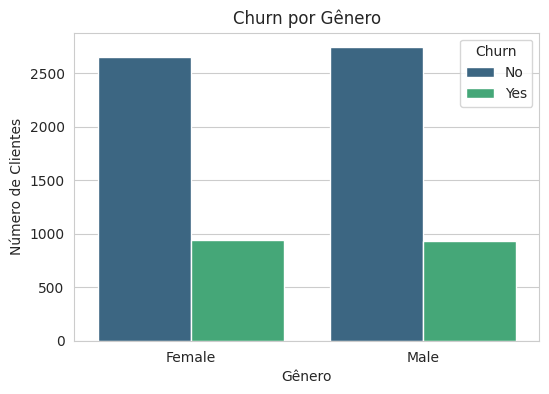

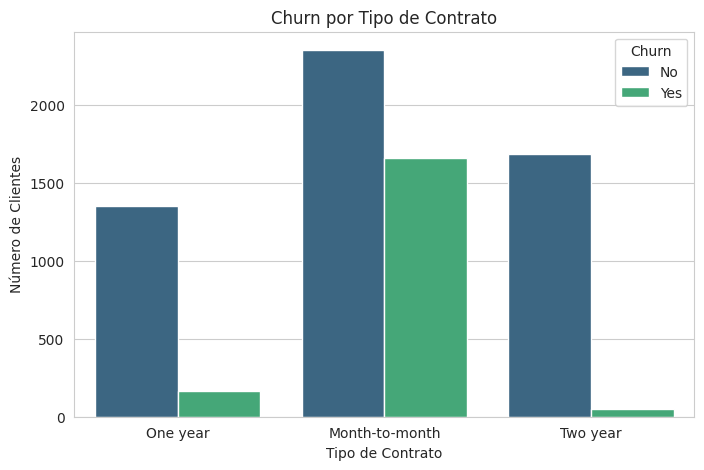

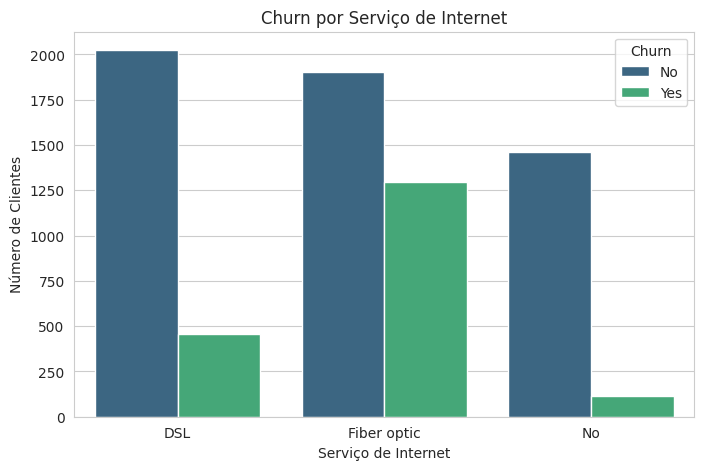

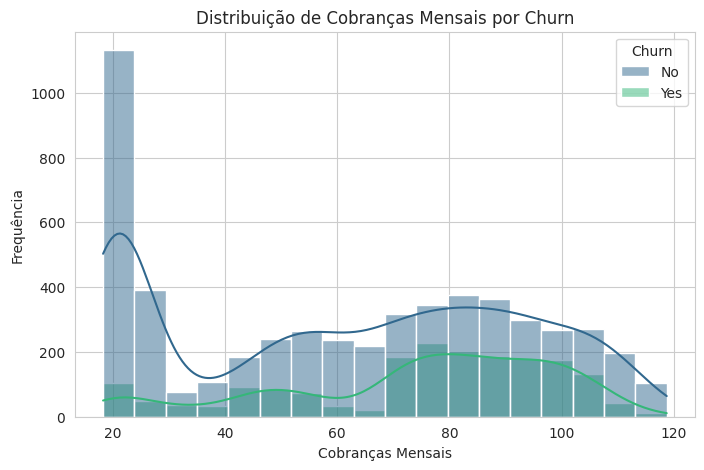

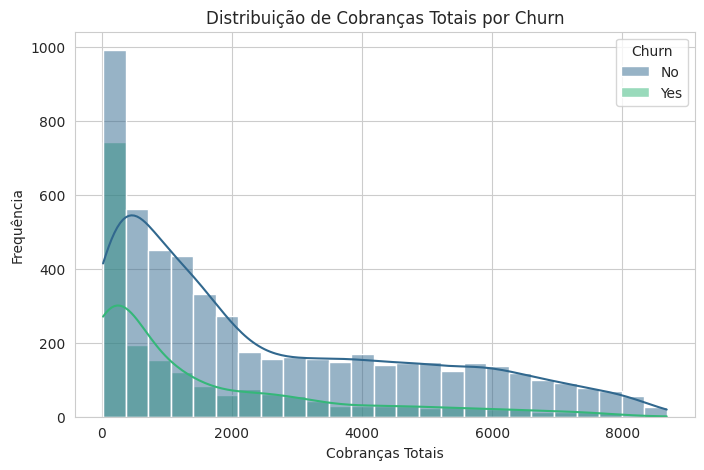

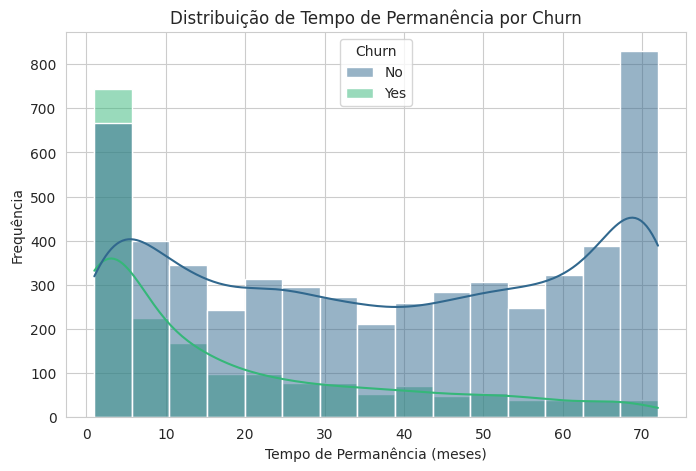

In [ ]:
# Configurar estilo dos gráficos
sns.set_style("whitegrid")

# Plot 1: Distribuição de Churn
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=df, palette="viridis")
plt.title("Distribuição de Churn")
plt.xlabel("Churn")
plt.ylabel("Número de Clientes")
plt.show()

# Plot 2: Churn por Gênero
plt.figure(figsize=(6, 4))
sns.countplot(x="gender", hue="Churn", data=df, palette="viridis")
plt.title("Churn por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Número de Clientes")
plt.show()

# Plot 3: Churn por Tipo de Contrato
plt.figure(figsize=(8, 5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="viridis")
plt.title("Churn por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Número de Clientes")
plt.show()

# Plot 4: Churn por Serviço de Internet
plt.figure(figsize=(8, 5))
sns.countplot(x="InternetService", hue="Churn", data=df, palette="viridis")
plt.title("Churn por Serviço de Internet")
plt.xlabel("Serviço de Internet")
plt.ylabel("Número de Clientes")
plt.show()

# Plot 5: Distribuição de Cobranças Mensais por Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Charges_Monthly", hue="Churn", kde=True, palette="viridis")
plt.title("Distribuição de Cobranças Mensais por Churn")
plt.xlabel("Cobranças Mensais")
plt.ylabel("Frequência")
plt.show()

# Plot 6: Distribuição de Cobranças Totais por Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Charges_Total", hue="Churn", kde=True, palette="viridis")
plt.title("Distribuição de Cobranças Totais por Churn")
plt.xlabel("Cobranças Totais")
plt.ylabel("Frequência")
plt.show()

# Plot 7: Distribuição de Tempo de Permanência por Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="tenure", hue="Churn", kde=True, palette="viridis")
plt.title("Distribuição de Tempo de Permanência por Churn")
plt.xlabel("Tempo de Permanência (meses)")
plt.ylabel("Frequência")
plt.show()

# 5. Geração de Insights e Conclusões

**Com base nas análises e visualizações, os seguintes insights foram identificados:**

• Tipo de Contrato: Clientes com contratos mensais ("Month-to-month") apresentam uma taxa de churn significativamente maior em comparação com contratos de um ou dois anos. Isso sugere que a fidelização através de contratos de longo prazo é eficaz.

• Serviço de Internet: Clientes com serviço de internet de fibra óptica ("Fiber optic") parecem ter uma taxa de churn mais alta do que aqueles com DSL ou sem serviço de internet. Isso pode indicar problemas de qualidade ou satisfação com o serviço de fibra óptica.

• Cobranças Mensais e Totais: Há uma tendência de clientes com cobranças mensais mais altas e cobranças totais mais baixas (indicando menor tempo de permanência) apresentarem maior churn. Isso reforça a ideia de que clientes novos ou com planos mais caros são mais propensos a evadir.

• Tempo de Permanência: Clientes com menor tempo de permanência são mais propensos a cancelar o serviço, o que é esperado, mas ressalta a importância de estratégias de retenção nos primeiros meses.

Próximos Passos Recomendados:

1. Análise Aprofundada: Investigar as razões por trás do alto churn em clientes com fibra óptica e contratos mensais.

2. Modelagem Preditiva: Utilizar as variáveis identificadas como relevantes para construir modelos de previsão de churn, permitindo à Telecom X identificar clientes em risco de evasão proativamente.

3. Desenvolvimento de Estratégias: Com base nos insights e nos modelos preditivos, desenvolver e implementar estratégias de retenção direcionadas, como ofertas especiais para clientes de contratos mensais ou melhorias no serviço de fibra óptica.



